# Data Exploration

Data is made of 1000 time series. Each time series is composed of historical data for calls that were *currently* near the money (<10%).

Each time serie has been sliced in blocks of 30 measurements, with a step of 10.

In the following scatter plots, blue dots represent slices for which `|bid(end) - bid(start)| > 3`, the black dots are the slices with "smaller" amplitude.

Data is normalize before PCA with scikit-learn's `StandardScaler`.

In [1]:
import json
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from mpl_toolkits import mplot3d
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
# raw time series
with open("../sample-data2.json") as f:
    data = json.load(f)
    
# movements time series
with open("../sample-mov2.json") as f:
    dmov = json.load(f)

# bid[end] - bid[start] difference for each slice
with open("../sample-bids2.json") as f:
    bids = np.array(json.load(f))    
    
# Time to expiration dates, in years.
with open("../sample-exp2.json") as f:
    exps = np.array(json.load(f))

In [3]:
cols = ["bid", "delta", "gamma", "impliedVolatility", "openInterest", "regularMarketChange", "regularMarketVolume", "theta", "timestamp", "vega", "volume"]

In [4]:
new_data = []
for ts in data:
    new_data.append([e for d in ts for e in d])
    
new_mov = []
for i in range(len(dmov)):
    new_mov.append([exps[i]] + [e for d in dmov[i] for e in d])
        
# Concatenate all slices for Paerson computation
new_data2 = [e for d in data for e in d]
new_mov2 = [e for d in dmov for e in d]

In [5]:
colors = []
for i in range(len(bids)):
    b = bids[i]
    if abs(b) > 3:
        colors.append("blue")
    else:
        colors.append("black")

## Raw time series analysis

We start with a pearson matrix, followed by PCA + PCA of each individual feature.

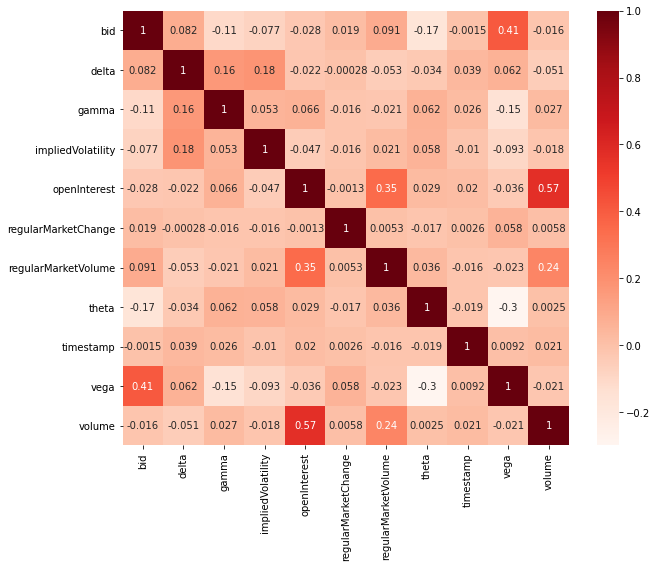

In [6]:
df = pd.DataFrame(new_data2, columns=cols)
plt.figure(figsize=(10,8))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

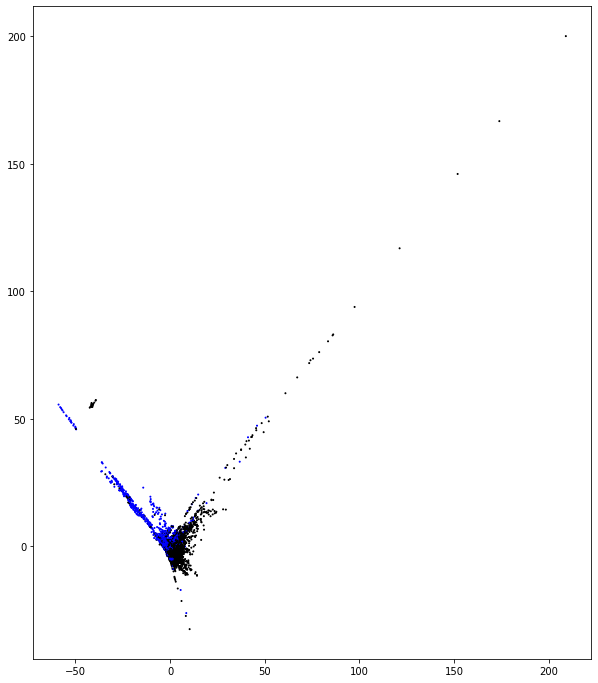

In [7]:
np_data = np.array(new_data)
np_data_norm = StandardScaler().fit_transform(np_data)
pca = PCA(n_components=2, svd_solver='randomized')
pc = pca.fit_transform(np_data_norm)
x = pc[:, 0]
y = pc[:, 1]
# z = pc[:, 2]
plt.figure(figsize=(10, 12)) 
ax = plt.axes()
ax.scatter(x, y, color=colors, s=1)
plt.show()

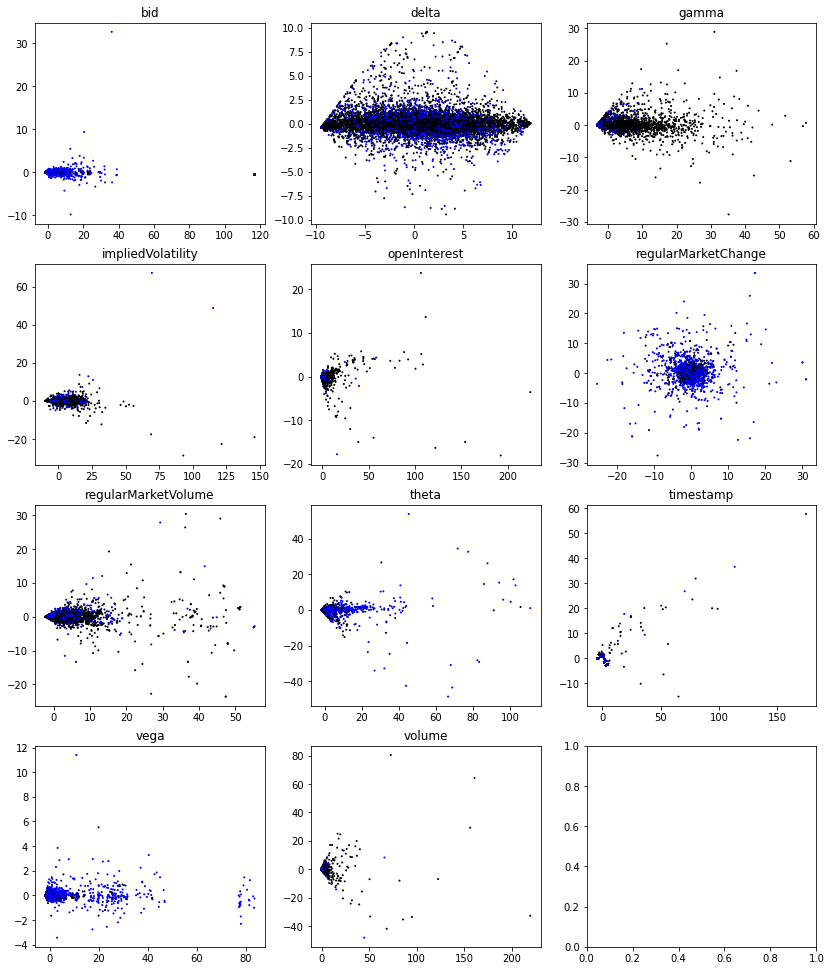

In [8]:
fig, axs = plt.subplots(4, 3, figsize=(14,17))
#axs[0, 0].scatter(x, y, color=colors, s=1)
for p in range(len(cols)):
    new_data_1f = []
    for i in range(len(data)):
        new_data_1f.append([d[p] for d in data[i]])
    np_data_1f = np.array(new_data_1f)
    np_data_norm_1f = StandardScaler().fit_transform(np_data_1f)
    pca_1f = PCA(n_components=2, svd_solver='randomized')
    pc_1f = pca_1f.fit_transform(np_data_norm_1f)
    x_1f = pc_1f[:, 0]
    y_1f = pc_1f[:, 1]
    axs[int(p / 3), p % 3].scatter(x_1f, y_1f, color=colors, s=1)
    axs[int(p / 3), p % 3].set_title(cols[p])
plt.show()

# Movement data analysis

This data is composed of the difference of the raw data vectors from one movement to another, ie. `mov[t] = raw[t] - raw[t-1]`.

Everything else remains the same, Paerson correlation coefficients followed by PCA + feature PCA.

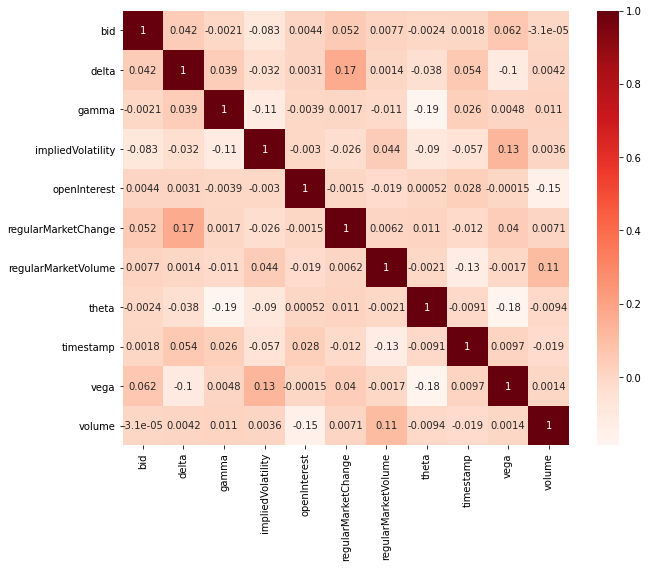

In [9]:
df = pd.DataFrame(new_mov2, columns=cols)
plt.figure(figsize=(10,8))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

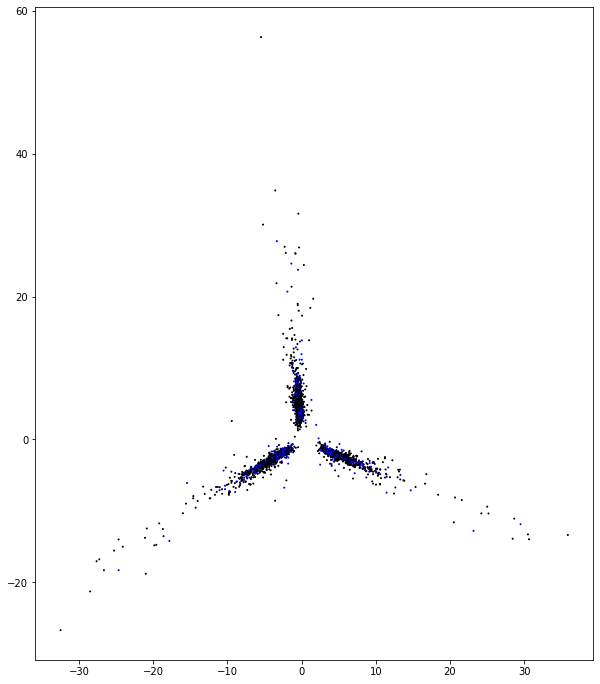

In [10]:
np_data = np.array(new_mov)
np_data_norm = StandardScaler().fit_transform(np_data)
pca = PCA(n_components=2, svd_solver='randomized')
pc = pca.fit_transform(np_data_norm)
x = pc[:, 0]
y = pc[:, 1]
# z = pc[:, 2]
plt.figure(figsize=(10, 12)) 
ax = plt.axes()
ax.scatter(x, y, color=colors, s=1)
plt.show()

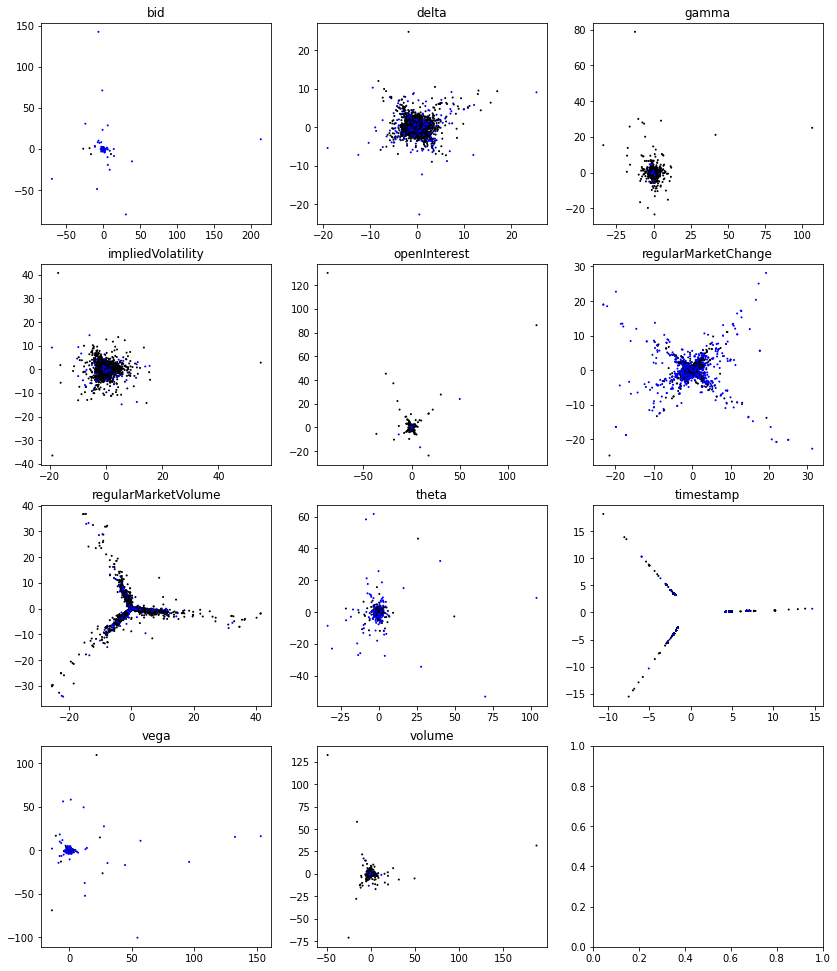

In [11]:
fig, axs = plt.subplots(4, 3, figsize=(14,17))
#axs[0, 0].scatter(x, y, color=colors, s=1)
for p in range(len(cols)):
    new_data_1f = []
    for i in range(len(data)):
        new_data_1f.append([d[p] for d in dmov[i]])
    np_data_1f = np.array(new_data_1f)
    np_data_norm_1f = StandardScaler().fit_transform(np_data_1f)
    pca_1f = PCA(n_components=2, svd_solver='randomized')
    pc_1f = pca_1f.fit_transform(np_data_norm_1f)
    x_1f = pc_1f[:, 0]
    y_1f = pc_1f[:, 1]
    axs[int(p / 3), p % 3].scatter(x_1f, y_1f, color=colors, s=1)
    axs[int(p / 3), p % 3].set_title(cols[p])
plt.show()